In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Class 09 Worksheet

## Importing & Profiling the Data
First, import the file, "dataDillionaireShows.csv", and save it in a variable called `dfShows`. Then, do some initial data profiling of the data. 

In [2]:
import pandas as pd
dfShows = pd.read_csv("dataDillionaireShows.csv")
dfShows

,ShowId,Genre,FirstAir
0,1,talk,2012-04-25
1,2,news,2012-04-19
2,3,talk,2018-06-21
3,4,talk,2014-04-23
4,5,talk,2010-03-30
...,...,...,...
2387,2388,reality,2010-04-22
2388,2389,cartoon,2013-10-25
2389,2390,talk,2010-08-09
2390,2391,talk,2013-11-04


In [3]:
dfShows.dtypes
dfShows.isna().sum()

ShowId       int64
Genre       object
FirstAir    object
dtype: object

ShowId      0
Genre       0
FirstAir    0
dtype: int64

In [4]:
dfShows.describe()

,ShowId
count,2392.000000
mean,1196.500000
std,690.655244
min,1.000000
25%,598.750000
50%,1196.500000
75%,1794.250000
max,2392.000000


In [5]:
dfShows["Genre"].value_counts()
dfShows["Genre"].value_counts(normalize = True)

Genre
action     331
news       313
talk       307
cartoon    297
reality    296
romance    295
comedy     282
horror     271
Name: count, dtype: int64

Genre
action     0.138378
news       0.130853
talk       0.128344
cartoon    0.124164
reality    0.123746
romance    0.123328
comedy     0.117893
horror     0.113294
Name: proportion, dtype: float64

Now import the file, "dataDillionaireWeekly.csv" and save it as `dfWeekly`:

In [6]:
dfWeekly = pd.read_csv("dataDillionaireWeekly.csv")
dfWeekly

,ShowId,Week,AirDate,PriorWeekMkt,Viewers
0,1,1,2012-05-02,74,10000
1,2,1,2012-04-26,59,60000
2,3,1,2018-06-28,88,280000
3,4,1,2014-04-30,47,300000
4,5,1,2010-04-06,7,260000
...,...,...,...,...,...
116333,1328,100,2013-05-03,65,10000
116334,1461,100,2013-01-06,18,100000
116335,2090,100,2012-07-29,11,40000
116336,2181,100,2012-07-05,5,40000


In [7]:
dfWeekly.dtypes
dfWeekly.isna().sum()

ShowId           int64
Week             int64
AirDate         object
PriorWeekMkt     int64
Viewers          int64
dtype: object

ShowId          0
Week            0
AirDate         0
PriorWeekMkt    0
Viewers         0
dtype: int64

In [8]:
dfWeekly.describe()
round(dfWeekly.describe(), 2) # here's a way to get rid of scientific notation

,ShowId,Week,PriorWeekMkt,Viewers
count,116338.000000,116338.000000,116338.000000,1.163380e+05
mean,1192.661968,33.050070,50.975021,1.341521e+05
std,693.038818,23.243396,28.553935,1.573749e+05
min,1.000000,1.000000,2.000000,0.000000e+00
25%,581.000000,13.000000,26.000000,5.000000e+04
50%,1198.000000,29.000000,51.000000,1.000000e+05
75%,1794.000000,49.000000,76.000000,1.900000e+05
max,2392.000000,100.000000,100.000000,1.460000e+07


,ShowId,Week,PriorWeekMkt,Viewers
count,116338.00,116338.00,116338.00,116338.00
mean,1192.66,33.05,50.98,134152.13
std,693.04,23.24,28.55,157374.88
min,1.00,1.00,2.00,0.00
25%,581.00,13.00,26.00,50000.00
50%,1198.00,29.00,51.00,100000.00
75%,1794.00,49.00,76.00,190000.00
max,2392.00,100.00,100.00,14600000.00


array([[<Axes: xlabel='PriorWeekMkt', ylabel='PriorWeekMkt'>,
        <Axes: xlabel='Viewers', ylabel='PriorWeekMkt'>],
       [<Axes: xlabel='PriorWeekMkt', ylabel='Viewers'>,
        <Axes: xlabel='Viewers', ylabel='Viewers'>]], dtype=object)

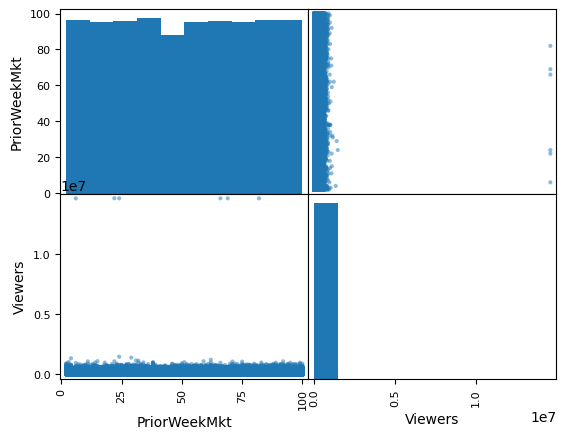

In [9]:
pd.plotting.scatter_matrix(dfWeekly[["PriorWeekMkt", "Viewers"]])

Let's query the `Viewers` column to see what the outlier data is:

In [10]:
dfWeekly.query("Viewers > 10000000")

,ShowId,Week,AirDate,PriorWeekMkt,Viewers
34199,994,16,2013-04-15,66,14600000
41668,462,20,2013-04-15,69,14600000
68754,146,36,2013-04-15,24,14600000
70571,595,37,2013-04-15,82,14600000
86009,1716,48,2013-04-15,22,14600000
107549,671,72,2013-04-15,6,14600000


4/15/2013 was Marathon Monday, so these were likely all news shows. Let's drop all the data from Marathon Monday (2013-04-15):

<Axes: ylabel='Frequency'>

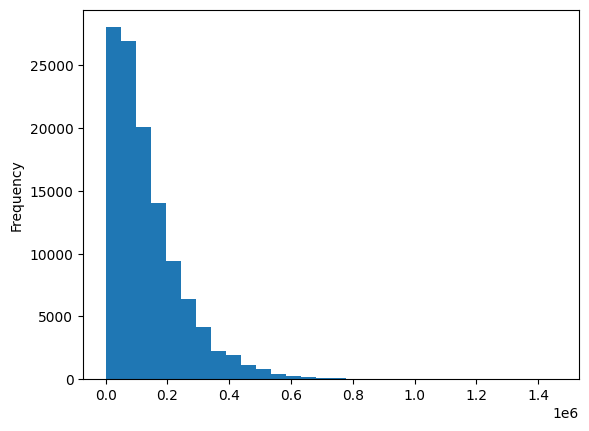

In [11]:
dfWeekly = dfWeekly.query("AirDate != '2013-04-15'")
dfWeekly["Viewers"].plot.hist(bins = 30)

## Merging Datasets

Often, we want to combine data in multiple files. SQL uses joins; the same idea works in python:

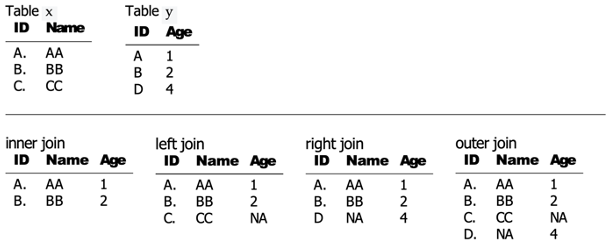

Let's merge the 2 datasets using an outer join:

In [12]:
dfTotal = pd.merge(dfShows, dfWeekly, how = "outer", on = "ShowId")
dfTotal
dfTotal.dtypes

,ShowId,Genre,FirstAir,Week,AirDate,PriorWeekMkt,Viewers
0,1,talk,2012-04-25,1,2012-05-02,74,10000
1,1,talk,2012-04-25,2,2012-05-09,18,0
2,1,talk,2012-04-25,3,2012-05-16,31,40000
3,1,talk,2012-04-25,4,2012-05-23,80,80000
4,1,talk,2012-04-25,5,2012-05-30,55,190000
...,...,...,...,...,...,...,...
116301,2392,comedy,2018-10-23,34,2019-06-18,80,190000
116302,2392,comedy,2018-10-23,35,2019-06-25,85,310000
116303,2392,comedy,2018-10-23,36,2019-07-02,84,180000
116304,2392,comedy,2018-10-23,37,2019-07-09,67,100000


ShowId           int64
Genre           object
FirstAir        object
Week             int64
AirDate         object
PriorWeekMkt     int64
Viewers          int64
dtype: object

For merging datasets, how python matches:
* By default, python matches on all columns with the same name
* You can change this using the `on` parameter

Similarities?
* JOIN in SQL
* VLOOKUP in Excel

Multiple matches?
* If a row in the left data matches multiple rows in the right data, all the rows in the right data will be returned, once for each matching row in the left data

### Feature Engineering

Let's add columns for Day and Month, since we might want to use these variables in our models:

In [13]:
dfTotal["Weekday"] = pd.to_datetime(dfTotal["AirDate"], format = "%Y-%m-%d").dt.day_name()
dfTotal["Month"] = pd.to_datetime(dfTotal["AirDate"], format = "%Y-%m-%d").dt.month_name()
dfTotal

,ShowId,Genre,FirstAir,Week,AirDate,PriorWeekMkt,Viewers,Weekday,Month
0,1,talk,2012-04-25,1,2012-05-02,74,10000,Wednesday,May
1,1,talk,2012-04-25,2,2012-05-09,18,0,Wednesday,May
2,1,talk,2012-04-25,3,2012-05-16,31,40000,Wednesday,May
3,1,talk,2012-04-25,4,2012-05-23,80,80000,Wednesday,May
4,1,talk,2012-04-25,5,2012-05-30,55,190000,Wednesday,May
...,...,...,...,...,...,...,...,...,...
116301,2392,comedy,2018-10-23,34,2019-06-18,80,190000,Tuesday,June
116302,2392,comedy,2018-10-23,35,2019-06-25,85,310000,Tuesday,June
116303,2392,comedy,2018-10-23,36,2019-07-02,84,180000,Tuesday,July
116304,2392,comedy,2018-10-23,37,2019-07-09,67,100000,Tuesday,July


## Summarizing Data

So far, we've counted with `value_counts()`. But often we need more than counts.

In [14]:
dfTotal["Genre"].value_counts()

Genre
action     15951
news       15805
talk       14974
cartoon    14167
reality    14103
romance    13860
comedy     13859
horror     13587
Name: count, dtype: int64

Let's use `groupby` to summarize our data:

In [15]:
dfTotal.groupby("Genre")["Viewers"].sum()

Genre
action     2333460000
cartoon    1705040000
comedy     2377020000
horror     1602580000
news       2029010000
reality    1806770000
romance    1874610000
talk       1790900000
Name: Viewers, dtype: int64

You try...sum the total viewers by day of the week:

In [16]:
dfTotal.groupby("Weekday")["Viewers"].sum()

Weekday
Friday       1886680000
Monday       2411900000
Saturday     2073260000
Sunday       2775120000
Thursday     1819820000
Tuesday      2160060000
Wednesday    2392550000
Name: Viewers, dtype: int64

We can also use `groupby` when visualizing the data. Copy/paste the code from above and add to it to create a bar chart for Viewers by weekday:

<Axes: xlabel='Weekday'>

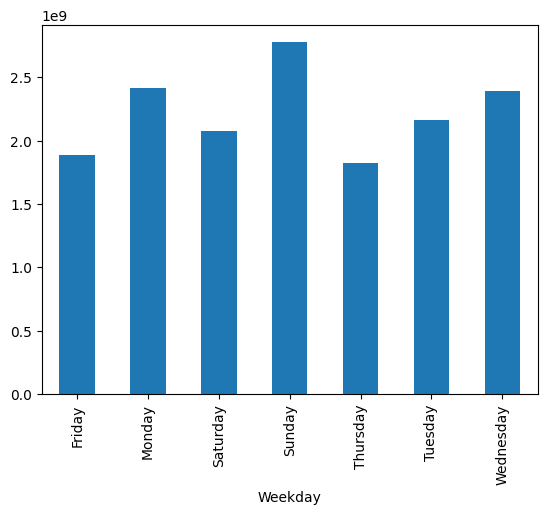

In [17]:
dfTotal.groupby("Weekday")["Viewers"].sum().plot.bar()

### Multiple Groupings
You can also group by multiple groupings. Just use a list in the `groupby` command:

In [18]:
dfTotal.groupby(["Genre", "Weekday"])["Viewers"].sum()

Genre    Weekday  
action   Friday       247600000
         Monday       369200000
         Saturday     316720000
         Sunday       376630000
         Thursday     327010000
         Tuesday      321470000
         Wednesday    374830000
cartoon  Friday       210190000
         Monday       226180000
         Saturday     235750000
         Sunday       370630000
         Thursday     161510000
         Tuesday      256280000
         Wednesday    244500000
comedy   Friday       368270000
         Monday       396980000
         Saturday     332700000
         Sunday       231050000
         Thursday     232820000
         Tuesday      326690000
         Wednesday    488510000
horror   Friday       189410000
         Monday       285170000
         Saturday     201220000
         Sunday       335270000
         Thursday     179210000
         Tuesday      200930000
         Wednesday    211370000
news     Friday       245090000
         Monday       346670000
         Saturday    

Now you try...calculate the sum of the viewers by Genre and Month:

In [19]:
dfTotal.groupby(["Genre", "Month"])["Viewers"].sum()

Genre   Month    
action  April        188360000
        August       172190000
        December     226970000
        February     209560000
        January      222070000
                       ...    
talk    March        157730000
        May          138830000
        November     165030000
        October      152840000
        September    134000000
Name: Viewers, Length: 96, dtype: int64

### Additional Metrics
You can calculate more than sums:

In [20]:
dfTotal.groupby("Genre")["Viewers"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
action,15951.0,146289.260861,122036.805525,0.0,60000.0,120000.0,200000.0,1210000.0
cartoon,14167.0,120352.932872,110874.501637,0.0,40000.0,90000.0,170000.0,900000.0
comedy,13859.0,171514.539289,132014.846136,0.0,80000.0,140000.0,240000.0,1460000.0
horror,13587.0,117949.510562,110027.054394,0.0,40000.0,90000.0,170000.0,1020000.0
news,15805.0,128377.728567,116473.102514,0.0,40000.0,100000.0,180000.0,1390000.0
reality,14103.0,128112.458342,114953.189724,0.0,40000.0,100000.0,180000.0,1330000.0
romance,13860.0,135253.246753,117666.420321,0.0,50000.0,100000.0,190000.0,1150000.0
talk,14974.0,119600.641111,110485.595634,0.0,40000.0,90000.0,170000.0,990000.0


## Practice Scenario

**Use the tools from the last 2 weeks' classes (econometric models & machine learning) to investigate how effective marketing spending is.**

In [21]:
import statsmodels.formula.api as smf
results = smf.ols("Viewers ~ PriorWeekMkt + Genre + Weekday + Month + Week", data = dfTotal).fit()
print(results.summary2()) # summary2() prints the results as floats, instead of scientific notation

                         Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.047       
Dependent Variable:      Viewers              AIC:                    3041481.2711
Date:                    2023-10-25 19:50     BIC:                    3041742.1985
No. Observations:        116306               Log-Likelihood:         -1.5207e+06 
Df Model:                26                   F-statistic:            220.3       
Df Residuals:            116279               Prob (F-statistic):     0.00        
R-squared:               0.047                Scale:                  1.3321e+10  
----------------------------------------------------------------------------------
                        Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------
Intercept            135157.7948 1875.4292  72.0677 0.0000 131481.9829 138833.6068
Genre[T.cartoon]     -26257.01

The `PriorWeekMkt` variable has a coefficient of 76.2 and is statistically signficant. This suggests that marketing from the prior week *does* increase viewership, when controlling for all of the other variables.

But does The Dillionaire differ in viewership on average than other shows? Let's create a variable to indicate if the show is The Dillionaire and include that in our model:

In [22]:
dfTotal["isDillionaire"] = dfTotal["ShowId"] == 175
dfTotal

,ShowId,Genre,FirstAir,Week,AirDate,PriorWeekMkt,Viewers,Weekday,Month,isDillionaire
0,1,talk,2012-04-25,1,2012-05-02,74,10000,Wednesday,May,False
1,1,talk,2012-04-25,2,2012-05-09,18,0,Wednesday,May,False
2,1,talk,2012-04-25,3,2012-05-16,31,40000,Wednesday,May,False
3,1,talk,2012-04-25,4,2012-05-23,80,80000,Wednesday,May,False
4,1,talk,2012-04-25,5,2012-05-30,55,190000,Wednesday,May,False
...,...,...,...,...,...,...,...,...,...,...
116301,2392,comedy,2018-10-23,34,2019-06-18,80,190000,Tuesday,June,False
116302,2392,comedy,2018-10-23,35,2019-06-25,85,310000,Tuesday,June,False
116303,2392,comedy,2018-10-23,36,2019-07-02,84,180000,Tuesday,July,False
116304,2392,comedy,2018-10-23,37,2019-07-09,67,100000,Tuesday,July,False


In [23]:
results2 = smf.ols("Viewers ~ PriorWeekMkt + Genre + Weekday + Month + Week + isDillionaire", data = dfTotal).fit()
print(results2.summary2())

                          Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:          0.047       
Dependent Variable:      Viewers               AIC:                     3041481.6575
Date:                    2023-10-25 19:50      BIC:                     3041752.2489
No. Observations:        116306                Log-Likelihood:          -1.5207e+06 
Df Model:                27                    F-statistic:             212.2       
Df Residuals:            116278                Prob (F-statistic):      0.00        
R-squared:               0.047                 Scale:                   1.3320e+10  
------------------------------------------------------------------------------------
                         Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
------------------------------------------------------------------------------------
Intercept             135163.2263  1875.4291  72.0706 0.0000 131487.4145 138839.0381
Genre[T

These results seem to suggest that viewership is lower for The Dillionaire than other shows, when controlling for other variables. ***But be careful of this interpretation...the results are not statistically different from 0 (based on the p = 0.2).***

Finally, let's use an interaction term to see if The Dillionaire differs in the effects of Prior Week Marketing:

In [24]:
results3 = smf.ols("Viewers ~ (PriorWeekMkt * isDillionaire) + Genre + Weekday + Month + Week", data = dfTotal).fit()
print(results3.summary2())

                                 Results: Ordinary least squares
Model:                         OLS                       Adj. R-squared:              0.047       
Dependent Variable:            Viewers                   AIC:                         3041483.6318
Date:                          2023-10-25 19:50          BIC:                         3041763.8872
No. Observations:              116306                    Log-Likelihood:              -1.5207e+06 
Df Model:                      28                        F-statistic:                 204.7       
Df Residuals:                  116277                    Prob (F-statistic):          0.00        
R-squared:                     0.047                     Scale:                       1.3321e+10  
--------------------------------------------------------------------------------------------------
                                      Coef.     Std.Err.     t     P>|t|     [0.025       0.975]  
--------------------------------------------

The interaction term is negative, suggesting that The Dillionaire decreases the effect of Prior Week Marketing. ***But, once again, watch that results are not statistically different from 0 (p = 0.87).***

### Need more challenge?

I'll go through the one analysis with the whole class. But if we're going slow and you'd like more challenge:
* I'll make a linear model. Instead, make a poisson model and compare the results
* Compare these results with a random forest model using `RandomForestRegressor` (not `RandomForestClassifier`)
* Consider additional interactions and variable transformations. Which of these improve the model and by how much?

#### Poisson Model:

In [25]:
resultsPoisson = smf.poisson("Viewers ~ (PriorWeekMkt * isDillionaire) + Genre + Weekday + Month + Week",\
                                 data = dfTotal).fit()
print(resultsPoisson.summary())

Optimization terminated successfully.
         Current function value: 45160.001234
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:                Viewers   No. Observations:               116306
Model:                        Poisson   Df Residuals:                   116277
Method:                           MLE   Df Model:                           28
Date:                Wed, 25 Oct 2023   Pseudo R-squ.:                 0.05085
Time:                        19:50:57   Log-Likelihood:            -5.2524e+09
converged:                       True   LL-Null:                   -5.5338e+09
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             11.8026   4.47e-05

Remember that the interpretation of the coefficients is different with poisson models. However, we can see that both the isDillionaire and interaction terms are now significant and negative. 

* The negative sign on isDillionaire suggests that viewership is lower for that show than other shows in the data on average, when holding all other variables constant
* The negative sign on the interaction term suggests that marketing is less effective in generating viewers for The Dillionaire than for other shows, when holding other variables constant

So this model DOES suggest that marketing is not as effective with The Dillionaire.

#### Random Forest Model

In [26]:
outcome = dfTotal["Viewers"]
numericFeatures = dfTotal[["PriorWeekMkt", "Week"]]
dummiesGenre = pd.get_dummies(dfTotal["Genre"], prefix = "Genre", drop_first = True)
dummiesWeekday = pd.get_dummies(dfTotal["Weekday"], prefix = "Weekday", drop_first = True)
dummiesMonth = pd.get_dummies(dfTotal["Month"], prefix = "Month", drop_first = True)
features = pd.concat([numericFeatures, dummiesGenre, dummiesWeekday, dummiesMonth], axis = 1)
outcome
features

0          10000
1              0
2          40000
3          80000
4         190000
           ...  
116301    190000
116302    310000
116303    180000
116304    100000
116305    210000
Name: Viewers, Length: 116306, dtype: int64

,PriorWeekMkt,Week,Genre_cartoon,Genre_comedy,Genre_horror,Genre_news,Genre_reality,Genre_romance,Genre_talk,Weekday_Monday,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,74,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,18,2,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,31,3,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,80,4,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,55,5,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116301,80,34,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
116302,85,35,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
116303,84,36,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
116304,67,37,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [27]:
from sklearn.model_selection import train_test_split
featuresTrain, featuresTest, outcomeTrain, outcomeTest = train_test_split(features, outcome, test_size = 0.33, random_state = 42)

In [28]:
import sklearn.ensemble
import numpy as np
modelForest = sklearn.ensemble.RandomForestRegressor(random_state = 42)
resultForest = modelForest.fit(featuresTrain, outcomeTrain)
predForestTest = modelForest.predict(featuresTest)
print(np.sqrt(sklearn.metrics.mean_squared_error(outcomeTest, predForestTest)))

122653.93718345196


The root mean squared error (RMSE) for the model is 122,654 for the Random Forest model. Let's compare this to the RMSE for the OLS model we created above:

In [29]:
predOLS = results3.predict(dfTotal)
print(np.sqrt(sklearn.metrics.mean_squared_error(dfTotal["Viewers"], predOLS)))

115400.44506498147


The RMSE is lower here (115,400), suggesting there is less error. However, keep in mind that we didn't use partitioned data for the OLS model, so it stands to reason that the error would be less given that the model was built using the entire dataset.

#### Transforming Variables

The "Viewers" variable is heavily skewed right, even after removing the Marathon Monday outliers. Let's use a log transformation to see if this has an effect on our OLS model. Mathematically, we can't take the log of any values less than or equal to 0. So, let's change any 0's for "Viewers" to a very small, but positive, number:

In [30]:
dfTotal.loc[dfTotal["Viewers"] == 0, "Viewers"] = 0.00000001

In [31]:
results4 = smf.ols("np.log(Viewers) ~ (PriorWeekMkt * isDillionaire) + Genre + Weekday + Month + Week", data = dfTotal).fit()
print(results4.summary2())

                          Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:          0.025      
Dependent Variable:      np.log(Viewers)       AIC:                     741042.0098
Date:                    2023-10-25 19:51      BIC:                     741322.2652
No. Observations:        116306                Log-Likelihood:          -3.7049e+05
Df Model:                28                    F-statistic:             107.5      
Df Residuals:            116277                Prob (F-statistic):      0.00       
R-squared:               0.025                 Scale:                   34.239     
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                          10.4242   0.0951 109.6324 0.0000 10.2379 10.6106
isDillionaire[T.Tr

Similar to the OLS model results, both "isDillionaire" and the interaction terms are statistically not different from 0 (p-values > 0.05). After running a series of different models, we've strengthened our conclusion that, while Prior Week Marketing *does* have a positive effect overall on viewership across all shows, at best, there is no marketing effect specifically with regards to The Dillionaire and, at worst, the Poisson model suggests marketing is less effective for The Dillionaire. 

This suggests we should either change our marketing strategies for The Dillionaire or spend money on other efforts to increase viewership of The Dillionaire (e.g., social media campaigns with influencers).